<a href="https://colab.research.google.com/github/JoelmPe/Estacio/blob/master/Miss%C3%A3o_N%C3%ADvel_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

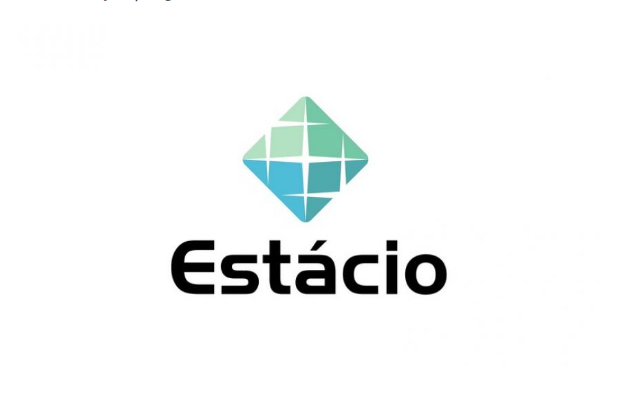

In [12]:
import cv2
from google.colab.patches import cv2_imshow
imagem = cv2.imread('/content/Imagem/logo_estacio.png')
cv2_imshow(imagem)

# **Desenvolvimento Full Stack -** ***Ensino FLEX***
Período 1 - Nível 5 - Colocando tudo em ordem e guardando

Aluna: Joelma Pereira da Silva 

Matrícula : 202209210574

# **Descrição da Missão**
 Implementação de um programa para manipular dados de um arquivo texto e visualizá-los em um histograma e nuvem de palavras.

# 0) Instalando pacote

In [19]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1) Gerar dados de testes

In [22]:
from faker import Faker
from datetime import datetime

fake = Faker('pt_BR')
print(fake.email())
print(fake.name())
print(fake.date_between_dates(date_start=datetime(2015,1,1), date_end=datetime(2019,12,31)))

from faker import Faker
fake = Faker('pt_BR')

for i in range(20):
  teste=fake.random_int(1,10)
  print(teste)
  #print(teste[0],' , ',teste[1])

vinicius68@example.net
Emilly da Cunha
2017-07-24
10
3
5
6
10
7
1
2
4
1
6
4
4
9
10
3
5
5
9
9


# 2) **Gravar e recuperar dados de arquivos textos**

1.   Escrevendo um arquivo com Python




In [23]:
%%writefile teste.txt
Teste Arquivo

Testando teste de arquivo texto

dsffdsfaaerggbhlçjh

fdgfdssc

ddfsw

Writing teste.txt


2. Abrindo um arquivo no Python

In [24]:
# Abre um arquivo txt já existente
my_file = open('teste.txt')

# Agora podemos ler o arquivo
lista=my_file.read().splitlines()
print(lista)

# Mas o que acontece se tentarmos lê-lo novamente?
my_file.read()

# Procure o início do arquivo (índice 0)
my_file.seek(0)

# Lê novamente
my_file.read()

# Readlines retorna uma lista das linhas no arquivo.
my_file.readlines()

# Readlines rodando seguidamente
my_file.readlines()

my_file.seek(0)
my_file.readlines()
my_file.seek(0)
lista_arq = my_file.readlines()
print(lista_arq[2])

['Teste Arquivo', '', 'Testando teste de arquivo texto', '', 'dsffdsfaaerggbhlçjh', '', 'fdgfdssc', '', 'ddfsw']
Testando teste de arquivo texto



3. Escrevendo um arquivo

In [25]:
# Adiciona um segundo argumento à função, 'w', que significa escrita
my_file = open('teste1.txt','w+')

# Escreve no arquivo
my_file.write('This is a new line\n')
my_file.write('This is another line\n')

# Lê o arquivo
my_file.seek(0)
teste=my_file.readlines()
print(teste[1])
my_file.close()

This is another line



Iterando através de um arquivo

In [27]:
%%writefile teste3.txt
Primeira linha
Segunda Linha

 line in open('teste3.txt'):
    print(line)

    import random
numeros=[];
my_file = open('test5.txt','w+')
for i in range(20):
  num = str(random.randint(1,200))
  numeros.append(num)
  
   
print(numeros)

for num in numeros:
  my_file.write(num+'\n')

my_file.close()

Writing teste3.txt


# 3) Manipular os dados para visualizá-los em um Histograma

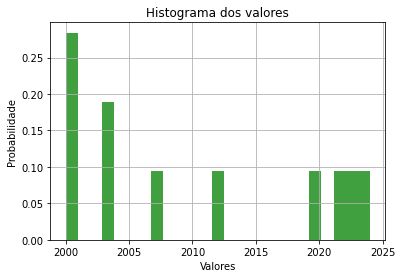

In [28]:
import matplotlib.pyplot as plt
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
#Returns: This returns the following:
#n :Valor de cada bin.
#bins :limites de cada bin. (por padrão ele divide em 10 bins)
#patches :retorna um lista com cada coluna do histograma.



lst_anos = [2000,2000,2000,2003,2003,2007,2012,2020,2022,2023,2024]
#lst_anos = [1,1,1,2,2,3,3,100]

 

#n, bins, colunas = plt.hist(lst_anos,facecolor='blue',alpha=0.75); 


num_bins=25; plt.hist(lst_anos,num_bins,density=True,facecolor='green', alpha=0.75)



plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.title('Histograma dos valores')
plt.grid(True)
plt.show()

# 4) Manipular os dados para visualizá-los em uma nuvem de palavras

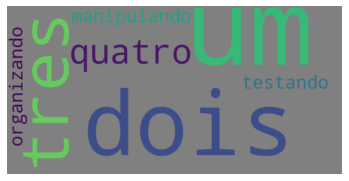

In [31]:
from wordcloud import WordCloud

texto ='um,um,dois,dois,um,tres,quatro,manipulando,testando,organizando' 
nuvem_palavras = WordCloud(background_color='grey',
                           width=800,height=400).generate(texto)
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
nuvem_palavras.to_file("Nuvem de palavras.png")

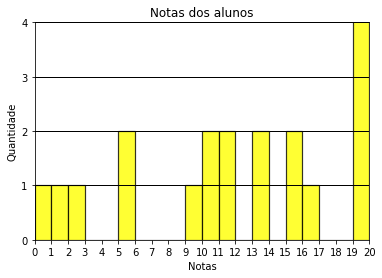

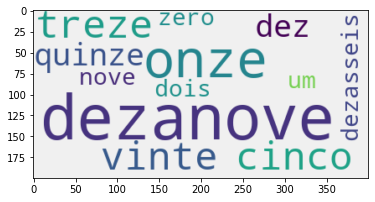

In [37]:
import random, ast


#Gerando o objeto fake usando a classe Faker 
fake = Faker('pt_BR')

#Gerando um dicionário com uma quantidade determinada de nomes aleatórios e pontos entre 0 e 20
quantidade = 20
lista = {fake.name(): random.randint(0,20) for i in range(quantidade)}

#Salvando o arquivo txt
open('nomes.txt', 'w').write(str(lista))

#Lendo o arquivo txt
lista = ast.literal_eval(open('nomes.txt', 'r').read())

#Gerando o Histograma
lista = [lista[i] for i in lista]
maior = 0
for i in lista:
    vezes = lista.count(i)
    if vezes > maior:
        maior = vezes

num_bins = 20
plt.hist(lista, num_bins, facecolor='yellow', alpha=0.8, edgecolor='#000', linewidth=1.2)
plt.xlabel('Notas')
plt.ylabel('Quantidade')
plt.title('Notas dos alunos')
plt.gca().yaxis.grid(True, color='#000', linestyle='-', linewidth=1)
plt.xticks([i for i in range(21)])
plt.xlim([0, 20])
plt.yticks([i for i in range(maior + 2)]) #Valores
plt.ylim([0, maior + 1]) #Quantidade
plt.show()

#Gerando a nuvem de palavras
lista = ','.join([num2words(i, lang='pt') for i in lista])
nuvem_palavras = WordCloud(background_color='#f0f0f0').generate(lista)
plt.imshow(nuvem_palavras, interpolation='bilinear')
pass

# **Análise e Conclusão:**

1.   ***Qual a importância de manipular arquivos de texto?***

Arquivos Txt são arquivos leves que podem ser editados facilmente, ele consegue ser lidos em qualquer Sistema Operacional e qualquer software e com isso a manipulação fica mais fácil e leve



2.   ***Qual a importância de visualizar os dados em um histograma?***
O histrograma é uma ferramente muito importante para análises estatísticas.
Ele cria um gráfico com os acontecimentos registrado em todo espectro. Através dele é possível identificar vários fatores que podem ser analisalados.



3. ***O que significa a visualização por nuvem de palavras?***

Uma nuvem de tags (nuvem de palavras ou lista
ponderada no design visual) é uma representação visual de dados de texto, normalmente usada para descrever metadados de palavras-chave (tags) em websites ou para visualizar texto livre.
O tamanho da fonte em que a palavra é apresentada é uma função da frequência da palavra no texto: palavras mais frequentes são desenhadas em fontes de tamanho maior, palavras menos frequentes são desenhadas em fontes de
tamanho menor. 

